# Covid-19, Omicron, Influenza, Pneumonia Detection

# Using Random Forest Algorithm



## 1. Data Pre-Processing
    a. Import Dataset

In [647]:
import os
import pandas as pd

In [648]:
dataset = pd.read_excel("Dataset.xlsx")

In [649]:
dataset.shape

(1284, 13)

In [650]:
dataset.head()

,Inisial,Batuk,Pilek,Sakit Tenggorokan,Sesak Nafas,Demam,Sakit Kepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
0,NaN,ya,ya,ya,ya,ya,ya,ya,tidak,ya,ya,tidak,tidak
1,NaN,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
2,NaN,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
3,NaN,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
4,NaN,ya,ya,tidak,ya,ya,ya,ya,ya,ya,ya,tidak,tidak


In [651]:
dataset.tail()

,Inisial,Batuk,Pilek,Sakit Tenggorokan,Sesak Nafas,Demam,Sakit Kepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
1279,NaN,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
1280,NaN,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
1281,NaN,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
1282,NaN,ya,tidak,tidak,tidak,ya,tidak,tidak,ya,tidak,tidak,tidak,tidak
1283,NaN,ya,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,NaN,ya,tidak


In [652]:
dataset.describe()

,Inisial,Batuk,Pilek,Sakit Tenggorokan,Sesak Nafas,Demam,Sakit Kepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
count,4,1284,1284,1281,1283,1284,1283,1284,1283,1284,1282,1284,1284
unique,1,2,2,3,2,2,3,2,2,3,2,2,2
top,-,ya,ya,tidak,tidak,tidak,tidak,ya,tidak,ya,tidak,tidak,tidak
freq,4,924,788,773,958,751,855,707,706,798,741,1003,1133


In [653]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Inisial             4 non-null      object
 1   Batuk               1284 non-null   object
 2   Pilek               1284 non-null   object
 3   Sakit Tenggorokan   1281 non-null   object
 4   Sesak Nafas         1283 non-null   object
 5   Demam               1284 non-null   object
 6   Sakit Kepala        1283 non-null   object
 7   Lemas               1284 non-null   object
 8   Anosmia             1283 non-null   object
 9   Covid-19            1284 non-null   object
 10  Omicron             1282 non-null   object
 11  Influenza           1284 non-null   object
 12  Pneumonia           1284 non-null   object
dtypes: object(13)
memory usage: 130.5+ KB


In [654]:
dataset.isnull().sum()

Inisial               1280
Batuk                    0
Pilek                    0
Sakit Tenggorokan        3
Sesak Nafas              1
Demam                    0
Sakit Kepala             1
Lemas                    0
Anosmia                  1
Covid-19                 0
Omicron                  2
Influenza                0
Pneumonia                0
dtype: int64

## 1. Data Pre-Processing
    b. Removes Useless Attributes

In [655]:
#Removes Useless Attribute: Inisial
dataset.drop('Inisial', axis = 1, inplace = True)

In [656]:
dataset.head(5)

,Batuk,Pilek,Sakit Tenggorokan,Sesak Nafas,Demam,Sakit Kepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
0,ya,ya,ya,ya,ya,ya,ya,tidak,ya,ya,tidak,tidak
1,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
2,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
3,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
4,ya,ya,tidak,ya,ya,ya,ya,ya,ya,ya,tidak,tidak


In [657]:
dataset.tail(5)

,Batuk,Pilek,Sakit Tenggorokan,Sesak Nafas,Demam,Sakit Kepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
1279,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
1280,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
1281,tidak,tidak,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,tidak,ya
1282,ya,tidak,tidak,tidak,ya,tidak,tidak,ya,tidak,tidak,tidak,tidak
1283,ya,ya,ya,tidak,tidak,tidak,tidak,tidak,tidak,NaN,ya,tidak


## 1. Data Pre-Processing
    c. Handling Missing Values

In [658]:
dataset.isnull().sum()    # Checking dataset for null value in each field

Batuk                 0
Pilek                 0
Sakit Tenggorokan     3
Sesak Nafas           1
Demam                 0
Sakit Kepala          1
Lemas                 0
Anosmia               1
Covid-19              0
Omicron               2
Influenza             0
Pneumonia             0
dtype: int64

In [659]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #seaborn for heatmap

<AxesSubplot:>

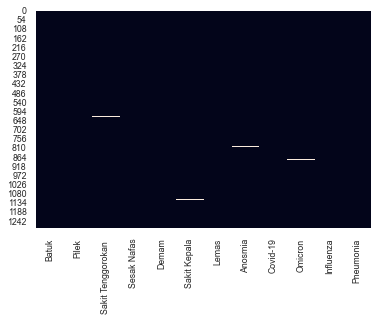

In [660]:
sns.heatmap(dataset.isnull(), cbar=False)

In [661]:
# df['real_lastName'] = np.where(df['LastName'].isnull(), df['Middle'], df['LastName'] )

In [662]:
dataset.columns = ['Batuk', 'Pilek', 'SakitTenggorokan', 'SesakNafas', 'Demam', 
                   'SakitKepala', 'Lemas', 'Anosmia', 'Covid-19', 'Omicron', 'Influenza', 'Pneumonia']

In [663]:
dataset.head(5)

,Batuk,Pilek,SakitTenggorokan,SesakNafas,Demam,SakitKepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
0,ya,ya,ya,ya,ya,ya,ya,tidak,ya,ya,tidak,tidak
1,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
2,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
3,ya,ya,ya,ya,ya,ya,ya,ya,ya,ya,tidak,tidak
4,ya,ya,tidak,ya,ya,ya,ya,ya,ya,ya,tidak,tidak


In [729]:
dataset.corr()

,Batuk,Pilek,SakitTenggorokan,SesakNafas,Demam,SakitKepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
Batuk,1.000000,0.377235,-0.004572,0.032386,0.131741,-0.055171,0.080951,0.059442,0.140815,-0.214275,0.086895,0.028723
Pilek,0.377235,1.000000,0.021658,-0.064213,0.061334,0.038456,0.026075,0.013752,0.056541,-0.173685,0.312588,-0.192012
SakitTenggorokan,-0.004572,0.021658,1.000000,-0.036017,-0.055870,0.055166,-0.016859,0.281212,0.408575,-0.041451,-0.233339,-0.201948
SesakNafas,0.032386,-0.064213,-0.036017,1.000000,-0.036027,-0.096260,0.147810,-0.181101,-0.193414,-0.004310,-0.288379,0.627106
Demam,0.131741,0.061334,-0.055870,-0.036027,1.000000,0.591231,0.217715,0.165416,-0.076471,0.134444,0.019779,-0.130914
SakitKepala,-0.055171,0.038456,0.055166,-0.096260,0.591231,1.000000,0.266811,0.170467,0.095037,0.131573,-0.088608,-0.222241
Lemas,0.080951,0.026075,-0.016859,0.147810,0.217715,0.266811,1.000000,0.238356,0.020938,0.042993,-0.174404,0.120807
Anosmia,0.059442,0.013752,0.281212,-0.181101,0.165416,0.170467,0.238356,1.000000,0.372694,0.240935,-0.448221,-0.330320
Covid-19,0.140815,0.056541,0.408575,-0.193414,-0.076471,0.095037,0.020938,0.372694,1.000000,-0.510870,-0.296104,-0.218216
Omicron,-0.214275,-0.173685,-0.041451,-0.004310,0.134444,0.131573,0.042993,0.240935,-0.510870,1.000000,-0.419414,-0.312012


In [665]:
# Check index of Null Value in Fitur SakitTenggorokan, and print all the attributes on null value index 

index_null_sakit_tenggorokan = dataset['SakitTenggorokan'][dataset['SakitTenggorokan'].isnull()].index.tolist()
print(index_null_sakit_tenggorokan)

for x in (index_null_sakit_tenggorokan): 
    print(dataset['Batuk'][x], dataset['Pilek'][x], dataset['SakitTenggorokan'][x], dataset['SesakNafas'][x], dataset['Demam'][x], 
          dataset['SakitKepala'][x], dataset['Lemas'][x], dataset['Anosmia'][x], dataset['Covid-19'][x], dataset['Omicron'][x], 
          dataset['Influenza'][x], dataset['Pneumonia'][x])

[624, 1080, 1129]
ya ya nan tidak tidak tidak ya ya ya tidak tidak tidak
ya ya nan tidak tidak tidak tidak tidak tidak tidak ya tidak
ya ya nan tidak ya ya ya tidak tidak tidak ya tidak


In [666]:
# Fill null value for field SakitTenggorokan base on Covid-19 condition

index_null_sakit_tenggorokan = dataset['SakitTenggorokan'][dataset['SakitTenggorokan'].isnull()].index.tolist()

for x in (index_null_sakit_tenggorokan): 
    if dataset['Covid-19'][x] == 'ya': 
        dataset['SakitTenggorokan'][x] = 'ya'
    elif dataset['Covid-19'][x] == 'tidak': 
        dataset['SakitTenggorokan'][x] = 'tidak'


In [667]:
# Check index of Null Value in Fitur SesakNafas, and print all the attributes on null value index 

index_null_sesak_nafas = dataset['SesakNafas'][dataset['SesakNafas'].isnull()].index.tolist()
print(index_null_sesak_nafas)

for x in (index_null_sesak_nafas): 
    print(dataset['Batuk'][x], dataset['Pilek'][x], dataset['SakitTenggorokan'][x], dataset['SesakNafas'][x], dataset['Demam'][x], 
          dataset['SakitKepala'][x], dataset['Lemas'][x], dataset['Anosmia'][x], dataset['Covid-19'][x], dataset['Omicron'][x], 
          dataset['Influenza'][x], dataset['Pneumonia'][x])

[629]
ya ya tidak nan tidak tidak ya ya ya tidak tidak tidak


In [668]:
# Fill null value for field SesakNafas base on Pnemonia condition

index_null_sesak_nafas = dataset['SesakNafas'][dataset['SesakNafas'].isnull()].index.tolist()

for x in (index_null_sesak_nafas):
    if dataset['Pneumonia'][x] == 'ya': 
        dataset['SesakNafas'][x] = 'ya'
    elif dataset['Pneumonia'][x] == 'tidak': 
        dataset['SesakNafas'][x] = 'tidak'

In [669]:
# Check index of Null Value in Fitur Anosmia, and print all the attributes on null value index 

index_null_anosmia = dataset['Anosmia'][dataset['Anosmia'].isnull()].index.tolist()
print(index_null_anosmia)

for x in (index_null_anosmia): 
    print(dataset['Batuk'][x], dataset['Pilek'][x], dataset['SakitTenggorokan'][x], dataset['SesakNafas'][x], dataset['Demam'][x], 
          dataset['SakitKepala'][x], dataset['Lemas'][x], dataset['Anosmia'][x], dataset['Covid-19'][x], dataset['Omicron'][x], 
          dataset['Influenza'][x], dataset['Pneumonia'][x])

[801]
ya ya ya tidak tidak tidak tidak nan ya tidak tidak tidak


In [670]:
# Fill null value for field Anosmia base on Covid-19 condition

index_null_anosmia = dataset['Anosmia'][dataset['Anosmia'].isnull()].index.tolist()

for x in (index_null_anosmia):
    if dataset['Covid-19'][x] == 'ya' or dataset['Omicron'][x] == 'ya': 
        dataset['Anosmia'][x] = 'ya'
    elif dataset['Covid-19'][x] == 'tidak' or dataset['Omicron'][x] == 'tidak': 
        dataset['Anosmia'][x] = 'tidak'

In [671]:
# Check index of Null Value in Fitur SakitKepala, and print all the attributes on null value index 

index_null_sakit_kepala = dataset['SakitKepala'][dataset['SakitKepala'].isnull()].index.tolist()
print(index_null_sakit_kepala)

for x in (index_null_sakit_kepala): 
    print(dataset['Batuk'][x], dataset['Pilek'][x], dataset['SakitTenggorokan'][x], dataset['SesakNafas'][x], dataset['Demam'][x], 
          dataset['SakitKepala'][x], dataset['Lemas'][x], dataset['Anosmia'][x], dataset['Covid-19'][x], dataset['Omicron'][x], 
          dataset['Influenza'][x], dataset['Pneumonia'][x])

[1114]
ya ya tidak tidak ya nan ya tidak tidak tidak ya tidak


In [672]:
# Fill null value for field SakitKepala base on Covid-19 and Fever condition

index_null_sakit_kepala = dataset['SakitKepala'][dataset['SakitKepala'].isnull()].index.tolist()

for x in (index_null_sakit_kepala):
    if dataset['Covid-19'][x] == 'ya' or dataset['Demam'][x] == 'ya': 
        dataset['SakitKepala'][x] = 'ya'
    elif dataset['Covid-19'][x] == 'tidak' or dataset['Demam'][x] == 'tidak': 
        dataset['SakitKepala'][x] = 'tidak'

In [673]:
# Check index of Null Value in Fitur Omicron, and print all the attributes on null value index 

index_null_omicron = dataset['Omicron'][dataset['Omicron'].isnull()].index.tolist()
print(index_null_omicron)

for x in (index_null_omicron): 
    print(dataset['Batuk'][x], dataset['Pilek'][x], dataset['SakitTenggorokan'][x], dataset['SesakNafas'][x], dataset['Demam'][x], 
          dataset['SakitKepala'][x], dataset['Lemas'][x], dataset['Anosmia'][x], dataset['Covid-19'][x], dataset['Omicron'][x], 
          dataset['Influenza'][x], dataset['Pneumonia'][x])

[878, 1283]
ya ya tidak tidak ya ya tidak ya ya nan ya tidak
ya ya ya tidak tidak tidak tidak tidak tidak nan ya tidak


In [674]:
# Fill null value for field Omicron base on Other Diseas

index_null_omicron = dataset['Omicron'][dataset['Omicron'].isnull()].index.tolist()

for x in (index_null_omicron):
    if dataset['Demam'][x] == 'ya' or dataset['SakitKepala'][x] == 'ya' or dataset['Anosmia'][x] == 'ya': 
        dataset['Omicron'][x] = 'tidak'
    elif dataset['Demam'][x] == 'tidak' or dataset['SakitKepala'][x] == 'tidak' or dataset['Anosmia'][x] == 'tidak':
        dataset['Omicron'][x] = 'ya'

In [675]:
# Check index of Null Value in Fitur Demam, and print all the attributes on null value index 

index_null_demam = dataset['Demam'][dataset['Demam'].isnull()].index.tolist()
print(index_null_demam)

for x in (index_null_omicron): 
    print(dataset['Batuk'][x], dataset['Pilek'][x], dataset['SakitTenggorokan'][x], dataset['SesakNafas'][x], dataset['Demam'][x], 
          dataset['SakitKepala'][x], dataset['Lemas'][x], dataset['Anosmia'][x], dataset['Covid-19'][x], dataset['Omicron'][x], 
          dataset['Influenza'][x], dataset['Pneumonia'][x])

[]
ya ya tidak tidak ya ya tidak ya ya tidak ya tidak
ya ya ya tidak tidak tidak tidak tidak tidak ya ya tidak


In [676]:
# Fill null value for field Demam base on Other Diseas

index_null_demam = dataset['Demam'][dataset['Demam'].isnull()].index.tolist()

for x in (index_null_demam):
    if dataset['Omicron'][x] == 'ya': 
        dataset['Demam'][x] = 'ya'
    elif dataset['Omicron'][x] == 'tidak': 
        dataset['Demam'][x] = 'tidak'

In [677]:
dataset.isnull().sum()

Batuk               0
Pilek               0
SakitTenggorokan    0
SesakNafas          0
Demam               0
SakitKepala         0
Lemas               0
Anosmia             0
Covid-19            0
Omicron             0
Influenza           0
Pneumonia           0
dtype: int64

<AxesSubplot:>

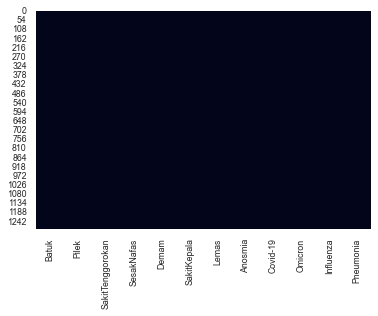

In [678]:
sns.heatmap(dataset.isnull(), cbar=False)

## 1. Data Pre-Processing
    d. Fix Different value Field

In [679]:
dataset['Batuk'].value_counts()

#No Different Value Found

ya       924
tidak    360
Name: Batuk, dtype: int64

In [680]:
dataset['Pilek'].value_counts()

#No Different Value Found

ya       788
tidak    496
Name: Pilek, dtype: int64

In [681]:
dataset['SakitTenggorokan'].value_counts()

# Different Value Found
# Before Fixing

tidak    775
ya       508
ua         1
Name: SakitTenggorokan, dtype: int64

In [682]:
for x in range(len(dataset['SakitTenggorokan'])):
    if dataset['SakitTenggorokan'][x] == 'ua': 
        dataset['SakitTenggorokan'][x] = 'ya'

In [683]:
dataset['SakitTenggorokan'].value_counts()
# After Fixing Different Value

tidak    775
ya       509
Name: SakitTenggorokan, dtype: int64

In [684]:
dataset['SesakNafas'].value_counts()

#No Different Value Found

tidak    959
ya       325
Name: SesakNafas, dtype: int64

In [685]:
dataset['Demam'].value_counts()

#No Different Value Found

tidak    751
ya       533
Name: Demam, dtype: int64

In [686]:
dataset['SakitKepala'].value_counts()

# Different Value Found
# Before Fixing

tidak     855
ya        428
tidaks      1
Name: SakitKepala, dtype: int64

In [687]:
for x in range(len(dataset['SakitKepala'])):
    if dataset['SakitKepala'][x] == 'tidaks': 
        dataset['SakitKepala'][x] = 'tidak'

In [688]:
dataset['SakitKepala'].value_counts()
# After Fixing Different Value

tidak    856
ya       428
Name: SakitKepala, dtype: int64

In [689]:
dataset['Lemas'].value_counts()

#No Different Value Found

ya       707
tidak    577
Name: Lemas, dtype: int64

In [690]:
dataset['Anosmia'].value_counts()

#No Different Value Found

tidak    706
ya       578
Name: Anosmia, dtype: int64

In [691]:
dataset['Covid-19'].value_counts()

# Different Value Found
# Before Fixing

ya       798
tidak    405
ya        81
Name: Covid-19, dtype: int64

In [692]:
len_dataset_cov = len(dataset['Covid-19'])

for x in range(len(dataset['Covid-19'])):
    if dataset['Covid-19'][x] == 'ya ' or dataset['Covid-19'][x] == 'ya  ': 
        dataset['Covid-19'][x] = 'ya'

In [693]:
dataset['Covid-19'].value_counts()
# After Fixing Different Value

ya       879
tidak    405
Name: Covid-19, dtype: int64

In [694]:
dataset['Omicron'].value_counts()

#No Different Value Found

tidak    742
ya       542
Name: Omicron, dtype: int64

In [695]:
dataset['Influenza'].value_counts()

#No Different Value Found

tidak    1003
ya        281
Name: Influenza, dtype: int64

In [696]:
dataset['Pneumonia'].value_counts()

#No Different Value Found

tidak    1133
ya        151
Name: Pneumonia, dtype: int64

In [697]:
for x in range(len(dataset['Covid-19'])):
    print(dataset['Covid-19'][x], dataset['Omicron'][x])

ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya ya
ya y

In [698]:
for x in range(len(dataset['Covid-19'])):
    if dataset['Covid-19'][x] == 'ya' and dataset['Omicron'][x] == 'ya': 
        dataset['Covid-19'][x] = 'tidak'

In [699]:
for x in range(len(dataset['Covid-19'])):
    if dataset['Covid-19'][x] == 'ya' or dataset['Omicron'][x] == 'ya': 
        print(dataset['Covid-19'][x], dataset['Omicron'][x])

tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
ya tidak
tidak ya
tidak ya
tidak ya
tidak ya
tidak ya
t

In [700]:
for x in range(len(dataset['Covid-19'])):
    if dataset['Covid-19'][x] == 'ya' and dataset['Pneumonia'][x] == 'ya': 
        dataset['Pneumonia'][x] = 'tidak'

In [701]:
for x in range(len(dataset['Covid-19'])):
    if dataset['Covid-19'][x] == 'ya' and dataset['Influenza'][x] == 'ya': 
        dataset['Influenza'][x] = 'tidak'

In [702]:
# Value Counts for target
vc_covid = dataset['Covid-19'].value_counts()
vc_omicron = dataset['Omicron'].value_counts()
vc_influenza = dataset['Influenza'].value_counts()
vc_pneumonia = dataset['Pneumonia'].value_counts()

# Value Counts for fitur
vc_sakit_tenggorokan = dataset['SakitTenggorokan'].value_counts()
vc_sesak_nafas = dataset['SesakNafas'].value_counts()
vc_anosmia = dataset['Anosmia'].value_counts()
vc_sakit_kepala = dataset['SakitKepala'].value_counts()

total_dataset = 1283

print(vc_covid['ya'], vc_omicron['ya'], vc_influenza['ya'], vc_pneumonia['ya'])
print(vc_covid['ya']+ vc_omicron['ya']+ vc_influenza['ya']+ vc_pneumonia['ya'])

338 542 253 151
1284


In [703]:
persentage_covid= vc_covid['ya'] / total_dataset*100
persentage_vc_omicron= vc_omicron['ya'] / total_dataset*100
persentage_influenza= vc_influenza['ya'] / total_dataset*100
persentage_pneumonia= vc_pneumonia['ya'] / total_dataset*100

print("persentase data pasien covid: {}%".format(persentage_covid))
print("persentase data pasien omicron: {}%".format(persentage_vc_omicron))
print("persentase data pasien influenza: {}%".format(persentage_influenza))
print("persentase data pasien pneumonia: {}%".format(persentage_pneumonia))

total_persentase = persentage_covid+persentage_vc_omicron+persentage_influenza+persentage_pneumonia
print("total persentase = {}%".format(total_persentase))

print('Persentase Covid-19 dengan nilai "ya" = {0} data, sedangkan persentase Covid-19 dengan nilai "tidak" = {1} data'.format(vc_covid['ya'], vc_covid['tidak']))
print('Persentase Omicron dengan nilai "ya" = {0} data, sedangkan persentase Omicron dengan nilai "tidak" = {1} data'.format(vc_omicron['ya'], vc_omicron['tidak']))
print('Persentase Influenza dengan nilai "ya" = {0} data, sedangkan persentase Influenza dengan nilai "tidak" = {1} data'.format(vc_influenza['ya'], vc_influenza['tidak']))
print('Persentase Pneumonia dengan nilai "ya" = {0} data, sedangkan persentase Pneumonia dengan nilai "tidak" = {1} data'.format(vc_pneumonia['ya'], vc_pneumonia['tidak']))

# print('persentase Covid-19 dengan nilai "ya" = {cov_ya} data, sedangkan persentase Covid-19 dengan nilai "tidak" = {cov_tid}'.format(cov_ya = vc_covid['ya'], cov_tid = vc_covid['tidak'])
      
#       vc_covid['ya'], vc_omicron['ya'], vc_influenza['ya'], vc_pneumonia['ya'], vc_covid['ya']+ vc_omicron['ya']+ vc_influenza['ya']+ vc_pneumonia['ya'], total_dataset

persentase data pasien covid: 26.344505066250974%
persentase data pasien omicron: 42.24473889321902%
persentase data pasien influenza: 19.719407638347622%
persentase data pasien pneumonia: 11.769290724863602%
total persentase = 100.07794232268122%
Persentase Covid-19 dengan nilai "ya" = 338 data, sedangkan persentase Covid-19 dengan nilai "tidak" = 946 data
Persentase Omicron dengan nilai "ya" = 542 data, sedangkan persentase Omicron dengan nilai "tidak" = 742 data
Persentase Influenza dengan nilai "ya" = 253 data, sedangkan persentase Influenza dengan nilai "tidak" = 1031 data
Persentase Pneumonia dengan nilai "ya" = 151 data, sedangkan persentase Pneumonia dengan nilai "tidak" = 1133 data


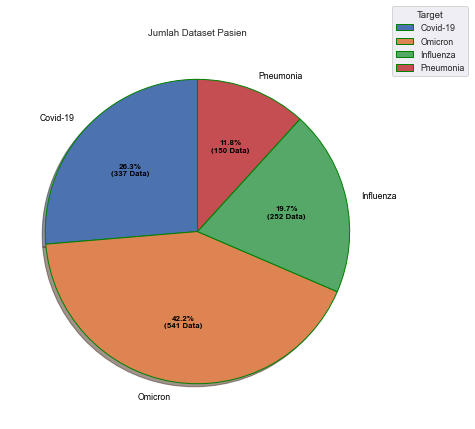

In [704]:
# Data Visualitaion for Data Percentage 

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
target = ['Covid-19', 'Omicron', 'Influenza', 'Pneumonia']
 
data = [vc_covid['ya'], vc_omicron['ya'], vc_influenza['ya'], vc_pneumonia['ya']]

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Data)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = target,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
# Adding legend
ax.legend(wedges, target,
          title ="Target",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Jumlah Dataset Pasien")
 
# show plot
plt.show()

## 1. Data Pre-Processing
    e. Integer Encoding

### METHOD 1
    Hot Encoding

In [705]:
dataset.dtypes

Batuk               object
Pilek               object
SakitTenggorokan    object
SesakNafas          object
Demam               object
SakitKepala         object
Lemas               object
Anosmia             object
Covid-19            object
Omicron             object
Influenza           object
Pneumonia           object
dtype: object

In [737]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(dataset).toarray())
encoder_df.shape

(1284, 24)

In [736]:
encoder_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1280,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1281,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1282,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [708]:
encoder_df.shape

(1284, 24)

### Method 2
    Label Encoder
    

In [734]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fitur_trg = ['Batuk', 'Pilek', 'SakitTenggorokan', 'SesakNafas', 'Demam', 
                   'SakitKepala', 'Lemas', 'Anosmia', 'Covid-19', 'Omicron', 'Influenza', 'Pneumonia'] 
for x in fitur_trg:
    dataset[x] = le.fit_transform(dataset[x])
dataset.shape

(1284, 12)

In [735]:
dataset

,Batuk,Pilek,SakitTenggorokan,SesakNafas,Demam,SakitKepala,Lemas,Anosmia,Covid-19,Omicron,Influenza,Pneumonia
0,1,1,1,1,1,1,1,0,0,1,0,0
1,1,1,1,1,1,1,1,1,0,1,0,0
2,1,1,1,1,1,1,1,1,0,1,0,0
3,1,1,1,1,1,1,1,1,0,1,0,0
4,1,1,0,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0,0,1,1,0,0,0,0,0,0,0,1
1280,0,0,1,1,0,0,0,0,0,0,0,1
1281,0,0,1,1,0,0,0,0,0,0,0,1
1282,1,0,0,0,1,0,0,1,0,0,0,0


In [712]:
dataset.shape

(1284, 12)

In [713]:
dataset['Batuk'].value_counts()

1    924
0    360
Name: Batuk, dtype: int64

In [714]:
dataset['SakitTenggorokan'].value_counts()

0    775
1    509
Name: SakitTenggorokan, dtype: int64

In [715]:
dataset['SesakNafas'].value_counts()

0    959
1    325
Name: SesakNafas, dtype: int64

In [716]:
dataset['Demam'].value_counts()

0    751
1    533
Name: Demam, dtype: int64

In [717]:
dataset['SakitKepala'].value_counts()

0    856
1    428
Name: SakitKepala, dtype: int64

In [718]:
dataset['Lemas'].value_counts()

1    707
0    577
Name: Lemas, dtype: int64

In [719]:
dataset['Anosmia'].value_counts()

0    706
1    578
Name: Anosmia, dtype: int64

In [720]:
dataset['Covid-19'].value_counts()

0    946
1    338
Name: Covid-19, dtype: int64

In [721]:
dataset['Omicron'].value_counts()

0    742
1    542
Name: Omicron, dtype: int64

In [722]:
dataset['Influenza'].value_counts()

0    1031
1     253
Name: Influenza, dtype: int64

In [723]:
dataset['Pneumonia'].value_counts()

0    1133
1     151
Name: Pneumonia, dtype: int64

In [724]:
dataset.isnull().sum()

Batuk               0
Pilek               0
SakitTenggorokan    0
SesakNafas          0
Demam               0
SakitKepala         0
Lemas               0
Anosmia             0
Covid-19            0
Omicron             0
Influenza           0
Pneumonia           0
dtype: int64

## 2. Implementation Random Forest Algorithm
    a. Extracting Independent and Dependent Values

In [725]:
x= dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values 

In [726]:
x

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]])

In [727]:
y = dataset.iloc[:, [8, 9, 10, 11]].values

In [728]:
y

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 0]])

## 2. Implementation Random Forest Algorithm
    b. Split dataset to train and test set

In [583]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state= None) 

In [167]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1027, 8), (257, 8), (1027, 4), (257, 4))

In [168]:
y_train.argmax(axis=1)

array([2, 1, 1, ..., 0, 0, 2])

In [169]:
y_test

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

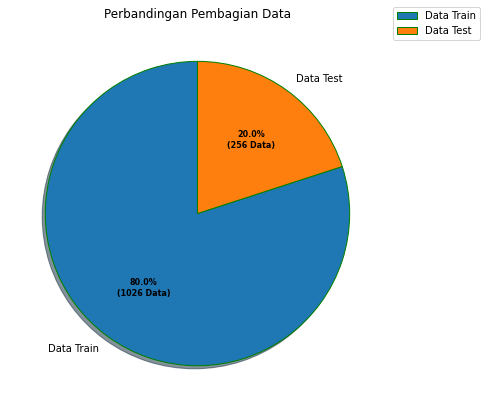

In [170]:
# Data Visualitaion for Data Percentage 

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
target = ['Data Train', 'Data Test']
 
data = [total_dataset*80/100, total_dataset*20/100]

# Creating explode data
explode = (0.0, 0.0)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Data)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = target,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
# Adding legend
ax.legend(wedges, target,
          title ="",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Perbandingan Pembagian Data")
 
# show plot
plt.show()

In [171]:
covid_data = np.count_nonzero(y_train.argmax(axis=1) == 0)
omicron_data = np.count_nonzero(y_train.argmax(axis=1) == 1)
influenza_data = np.count_nonzero(y_train.argmax(axis=1) == 2)
pneumonia_data = np.count_nonzero(y_train.argmax(axis=1) == 3)

covid_data, omicron_data, influenza_data, pneumonia_data

(273, 441, 198, 115)

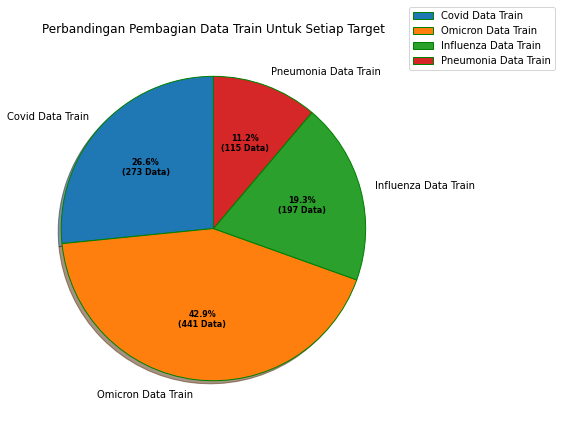

In [172]:
# Training Data Value Visualitaion for Data Percentage 

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
target = ['Covid Data Train', 'Omicron Data Train', 'Influenza Data Train', 'Pneumonia Data Train']
 
data = [covid_data, omicron_data, influenza_data, pneumonia_data]

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Data)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = target,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
# Adding legend
ax.legend(wedges, target,
          title ="",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Perbandingan Pembagian Data Train Untuk Setiap Target")
 
# show plot
plt.show()

#### n_estimators for thesis is: 10, 20, 50, 100
#### max_features= 8 
#### max_depth= 4, 5, none
#### criterion= entropy

In [618]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators = 20, criterion="entropy", max_features= 8, max_depth = None)  
classifier= classifier.fit(x_train, y_train) 
classifier

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)

In [619]:
y_pred= classifier.predict(x_test) 

In [620]:
x_train, x_test

(array([[1, 0, 1, ..., 0, 0, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 1, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 0, 1]]),
 array([[1, 0, 1, ..., 0, 1, 1],
        [1, 1, 0, ..., 1, 1, 0],
        [1, 1, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [1, 0, 1, ..., 1, 1, 0],
        [1, 1, 0, ..., 0, 1, 1]]))

In [621]:
y_train

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [622]:
y_pred, y_test

(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0]]),
 array([[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0]]))

In [623]:
y_pred

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [624]:
y_test

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [625]:
y_pred.argmax(axis=1), y_test.argmax(axis=1)

(array([0, 1, 1, 3, 0, 1, 1, 2, 2, 1, 3, 1, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1,
        1, 3, 2, 3, 2, 1, 1, 0, 1, 3, 2, 1, 3, 2, 2, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 3, 0, 0, 0, 0, 2, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2,
        0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 3, 1, 1, 3, 0, 0, 1, 2, 0, 1, 2,
        1, 1, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0,
        2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 3, 1, 2, 1, 0, 2, 2, 1, 3, 2, 0, 1,
        1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 3, 1, 0, 1, 2, 1, 1, 3, 3, 0, 1, 1,
        3, 0, 0, 0, 1, 3, 2, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 0, 1, 1, 3, 2,
        1, 0, 0, 1, 1, 2, 2, 1, 3, 2, 3, 0, 2, 2, 2, 0, 1, 3, 3, 1, 2, 1,
        0, 1, 0, 2, 0, 2, 0, 3, 0, 1, 2, 1, 1, 2, 3, 1, 3, 0, 1, 1, 2, 1,
        3, 1, 2, 3, 2, 0, 0, 0, 1, 3, 1, 0, 1, 2, 0, 2, 0, 0, 2, 3, 1, 2,
        1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1]),
 array([0, 3, 1, 3, 0, 1, 1, 2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 0, 2, 3, 1, 1,
        1, 3, 2, 3, 2, 1, 1, 0, 1, 3, 2, 1, 3, 2, 2, 1, 0

In [626]:
# classifier.estimators_

In [627]:
# from sklearn import tree
# from sklearn.tree import export_graphviz

# plt.figure(figsize = (300,300))
# tree.plot_tree(classifier.estimators_[1], filled=True)

In [646]:
print(classifier)
print(accuracy_score(y_test, y_pred))

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)
0.867704280155642


In [629]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        67
           1       0.88      0.83      0.86       103
           2       0.84      0.91      0.88        54
           3       0.86      0.94      0.90        33

   micro avg       0.87      0.87      0.87       257
   macro avg       0.87      0.88      0.87       257
weighted avg       0.87      0.87      0.87       257
 samples avg       0.87      0.87      0.87       257



In [643]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  
matrix

array([[57,  6,  2,  2],
       [ 7, 86,  7,  3],
       [ 1,  4, 49,  0],
       [ 0,  2,  0, 31]])

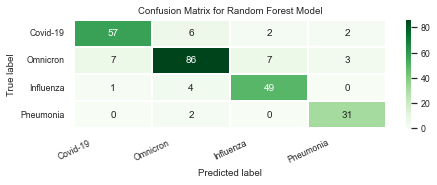

In [644]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Covid-19', 'Omnicron', 
               'Influenza', 'Pneumonia']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# ya	ya	tidak	ya	tidak	tidak	ya	tidak
# ya	ya	tidak	tidak	ya	ya	ya	tidak

In [645]:
manual_testing = classifier.predict([
    [ 1, 1, 1, 1, 1, 1, 1, 1], # 1. Mengalami semua gejala
    [ 0, 1, 0, 0, 0, 0, 0, 0], # 2. Mengalami gejala pilek saja
    [ 1, 1, 1, 0, 0, 0, 0, 1], # 3. Mengalami gejala batuk, pilek, sakit tenggorokan
    [ 1, 1, 0, 0, 0, 0, 0, 0], # 4. Mengalami gejala batuk, pilek, sesak nafas, 
    [ 1, 1, 0, 1, 0, 0, 1, 0], # 5. Mengalami gejala batuk, pilek, sesak nafas, lemas
    [ 1, 1, 0, 0, 1, 1, 1, 0], # 6. Mengalami gejala batuk, pilek, demam, sakit kepala, lemas
    [ 0, 1, 1, 1, 0, 0, 0, 0], # 7. Mengalami gejala pilek, sakit tenggorokan, sesak nafas
    [ 1, 0, 1, 0, 1, 0, 1, 0], # 8. Mengalami gejala batuk, sakit tenggorokan, demam, lemas
    [ 0, 0, 0, 0, 1, 1, 1, 0], # 9. Mengalami gejala demam, sakit kepala, lemas
    [ 1, 1, 1, 1, 1, 1, 0, 0], # 10. Mengalami batuk, pilek, sakit tenggorokan, sesak nafas, demam, sakit kepala
    [ 1, 1, 0, 1, 0, 0, 1, 0], # 11. Mengalami Batuk, pilek, sakit tenggorokan, sesak nafas, lemas
                     ])

manual_testing.argmax(axis=1)

array([1, 2, 0, 2, 3, 2, 0, 1, 1, 1, 3])

In [641]:
#export best model 
import pickle
filename = 'best_rf_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [642]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
result

0.867704280155642

## Re-check Input Gejala

### Gejala Batuk

In [157]:
sum((dataset['Batuk'] == 1))

924

In [137]:
sum((dataset['Batuk'] == 0))

360

In [134]:
sum((dataset['Omicron'] == 1))

542

In [114]:
sum((dataset['Batuk'] == 1) & (dataset['Omicron'] == 1))

329

In [138]:
sum((dataset['Batuk'] == 1) & (dataset['Covid-19'] == 1))

279

In [139]:
sum((dataset['Batuk'] == 1) & (dataset['Pneumonia'] == 1))

114

In [140]:
sum((dataset['Batuk'] == 1) & (dataset['Influenza'] == 1))

202

In [124]:
# Jumlah Dataset dengan gejala hanya batuk
sum((dataset['Batuk'] == 1) & (dataset['Pilek'] == 0) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0))

25

In [126]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Omicron
sum((dataset['Batuk'] == 1) & (dataset['Pilek'] == 0) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Omicron'] == 1))

15

In [127]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Covid-19
sum((dataset['Batuk'] == 1) & (dataset['Pilek'] == 0) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Covid-19'] == 1))

0

In [147]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Influenza
sum((dataset['Batuk'] == 1) & (dataset['Pilek'] == 0) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Influenza'] == 1))

10

### Gejala Pilek

In [325]:
sum((dataset['Pilek'] == 1))

788

In [136]:
sum((dataset['Pilek'] == 0))

496

In [143]:
sum((dataset['Pilek'] == 1) & (dataset['Covid-19'] == 1))

223

In [142]:
sum((dataset['Pilek'] == 1) & (dataset['Omicron'] == 1))

279

In [144]:
sum((dataset['Pilek'] == 1) & (dataset['Influenza'] == 1))

233

In [145]:
sum((dataset['Pilek'] == 1) & (dataset['Pneumonia'] == 1))

54

In [324]:
# Jumlah Dataset dengan gejala hanya Pilek
sum((dataset['Batuk'] == 0) & (dataset['Pilek'] == 1) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0))

1

In [149]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Covid-19
sum((dataset['Batuk'] == 0) & (dataset['Pilek'] == 1) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Covid-19'] == 1))

0

In [151]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Omicron
sum((dataset['Batuk'] == 0) & (dataset['Pilek'] == 1) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Omicron'] == 1))

0

In [153]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Influenza
sum((dataset['Batuk'] == 0) & (dataset['Pilek'] == 1) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Influenza'] == 1))

1

In [155]:
# Jumlah Dataset dengan gejala hanya batuk dan dengan diagnosa penyakit Pneumonia
sum((dataset['Batuk'] == 0) & (dataset['Pilek'] == 1) & (dataset['SakitTenggorokan'] == 0)  
    & (dataset['SesakNafas'] == 0) & (dataset['Demam'] == 0) & (dataset['SakitKepala'] == 0)
    & (dataset['Lemas'] == 0) & (dataset['Anosmia'] == 0) & (dataset['Pneumonia'] == 1))

0